In [1]:
!pip install qiskit[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.5/541.5 kB 23.0 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=e6bc723eac7ac76f898443560c4a520da5ad82b35b6f16a168560917b6275c0c
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
  Created wheel for p

In [118]:
from qiskit import *
from qiskit.circuit.library import UnitaryGate
from qiskit.quantum_info import Statevector
import numpy as np
import math

In [111]:
def urot(k):
  return np.array([[1, 0], [0, np.exp((2*np.pi*1j)/math.pow(2, k))]])

def QFT(qubits):
  circuit = QuantumCircuit(qubits)

  for i in range(qubits):
    circuit.h(i)
    for j in range(1, qubits - i):
      rot = UnitaryGate(urot(j+1)).control(1)
      circuit.append(rot, [j+i, i])
    circuit.barrier()

  # if qubits%2 == 0:
  #   l1 = range(0, qubits//2)
  #   l2 = list(range(qubits//2, qubits))
  # else:
  #   l1 = range(0, (qubits-1)//2)
  #   l2 = list(range((qubits+1)//2, qubits))

  # l2.reverse()
  # circuit.swap(l1, l2)

  return circuit

In [115]:
qubits = 3
circuit = QFT(qubits)

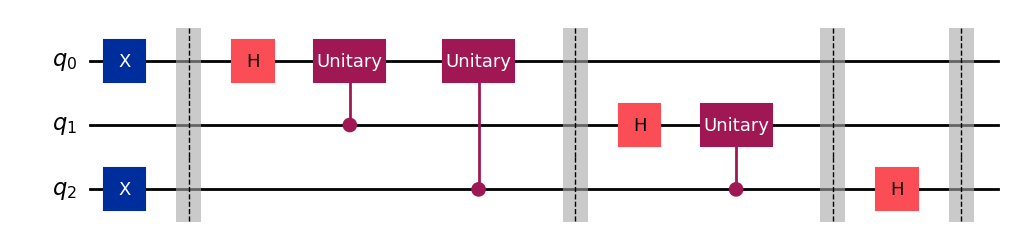

In [116]:
circ = QuantumCircuit(qubits)
circ.x([0, 2]) #5
circ.barrier()

combined = circ.compose(circuit)
combined.draw("mpl")

In [117]:
state = Statevector.from_instruction(combined) #QFT of 5
state.draw("latex")

<IPython.core.display.Latex object>

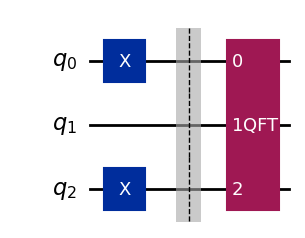

In [122]:
#Used for verification

from qiskit.circuit.library.basis_change import QFT
qft_circ = QFT(num_qubits=3, do_swaps=True)
circ = QuantumCircuit(qubits)
circ.x([0, 2])
circ.barrier()

combined = circ.compose(qft_circ)
combined.draw("mpl")

In [123]:
state = Statevector.from_instruction(combined)
state.draw("latex")

<IPython.core.display.Latex object>